<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [130]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-12 19:03:51--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.1MB/s    in 4.3s    

2020-05-12 19:03:55 (46.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [131]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [132]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [133]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# inspect the products dataset
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [136]:
# concatenate training dataset with testing dataset and inspect
order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [137]:
# merge training data set with test dataset on product_id field
# to link product_name with order_id
order_products_by_name = pd.merge(products, order_products)
order_products_by_name.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,9273,30,0


In [138]:
# aggregate each record by its 'product_name'
orders_grouped_by_name = order_products_by_name.groupby('product_name')

# only one column necessary ('order_id') - any column w/o null values will work
# count the number of entries in each group
order_counts = orders_grouped_by_name[['order_id']].count()

# sort the orders by number counted in descending order
# reset index to flatten and return the 10 most frquently ordered items
top_10_orders = order_counts.sort_values(by=['order_id'],ascending=False).reset_index().head(n=10)

# rename the columns to show that the second column displays
# the number of times an item was ordered
top_10_orders = top_10_orders.rename(columns={
    'product_name': 'product_name',
    'order_id': 'times_ordered'
})

top_10_orders

,product_name,times_ordered
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# for replicated lesson code visit: https://colab.research.google.com/drive/16gB1V3M_cisznAotWM6JvjXtxFyVOXF0?usp=sharing

In [140]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [141]:
# table2 -> tidy

# convert index into
table2 = table2.reset_index()

# convert column headers into a column and rename column headers
tidy = table2.melt(id_vars='index').rename(columns = {
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})

tidy

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [142]:
# tidy -> table2

# convert trt to index and names column to column headers
table2 = tidy.pivot(index='trt', columns='name', values='result')
table2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
flights = sns.load_dataset('flights')

In [144]:
flights.pivot(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [146]:
# inspect the orders dataset - observe that it contains a relevant
# column: 'order_hour_of_day'
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# to link an order_id, product_name merge, and order_hour_of_day merge 3 datasets:
# products, order_products, and orders
# products and order_products were previously merged as order_products_by_name

orders_by_name = pd.merge(order_products_by_name, orders)

In [148]:
orders_by_name.sample(5)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
30250911,47303,Andouille Sausage,106,12,3304166,6,0,179346,prior,1,0,15,NaN
1574658,4920,Seedless Red Grapes,123,4,3129952,5,1,120018,train,4,1,18,30.0
21738004,33050,Family Size Lasagna With Meat & Sauce,38,1,802671,1,0,42626,prior,5,0,18,0.0
25501731,10070,Organic 1% Low Fat Milk,84,16,3012380,1,1,46634,prior,13,6,11,4.0
20634923,39984,Organic Dill,16,4,839336,10,0,171386,prior,12,5,11,1.0


In [149]:
# select only those orders purchased after the hour demarcating "late" orders

late_hour = 12
late_orders = orders_by_name.loc[orders_by_name['order_hour_of_day'] > late_hour]
late_orders.sample(5)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
25498262,21330,Oikos Greek Plain Fat Free Yogurt,120,16,2806057,4,0,197327,prior,1,3,15,NaN
21739882,36619,Pure Goat Milk Herb Chabis Cheese,21,16,823568,1,0,196932,prior,56,3,14,6.0
6281241,890,Organic Diced Tomatoes,81,15,558043,4,1,3194,prior,19,5,16,5.0
30611992,33768,Sinfully Sweet Campari Tomatoes,83,4,1181626,4,1,11454,prior,32,6,13,14.0
2487383,27966,Organic Raspberries,123,4,1366796,6,1,16667,prior,9,0,13,10.0


In [150]:
# aggregate each row by 'product_name'
late_order_counts = late_orders.groupby('product_name')[['order_id']].count()

# sort the counts in descending order and return the top 25 most frequent
top_25_late_orders = late_order_counts.sort_values(by='order_id', ascending=False).head(25)

# rename the column headers to reflect the value being measured
top_25_late_orders = top_25_late_orders.reset_index().rename(columns={
    'order_id': f'times_ordered_after_hour_of_day_{late_hour}'
})

top_25_late_orders

,product_name,times_ordered_after_hour_of_day_12
0,Banana,275720
1,Bag of Organic Bananas,221476
2,Organic Strawberries,157296
3,Organic Baby Spinach,143816
4,Organic Hass Avocado,126847
5,Organic Avocado,106522
6,Large Lemon,90751
7,Limes,84053
8,Strawberries,82881
9,Organic Whole Milk,80125


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

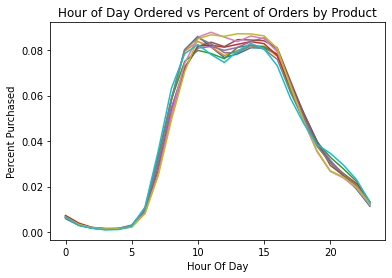

In [181]:
# "hour of day ordered" vs "percent of orders by product"

plt.title("Hour of Day Ordered vs Percent of Orders by Product")
plt.ylabel("percent purchased".title())
plt.xlabel("hour of day".title())

for name in top_10_orders['product_name']:
  # filter the dataset for a given name
  ordered = orders_by_name.loc[orders_by_name['product_name'] == name]
  # calculate the percent ordered by time of day
  ordered_pct = ordered['order_hour_of_day'].value_counts(normalize=True).sort_index().plot();